#### Load Images

In [14]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

import PIL
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from sklearn.metrics import accuracy_score, f1_score, jaccard_score, pairwise

#### Upload

In [18]:
def plot_comparison(image, mask, pred):
    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].contour(mask, colors='y', levels=[0.5])
    ax[1].imshow(mask)
    ax[1].set_title('Target Segmentation')
    ax[2].imshow(pred)
    ax[2].set_title('Obtained Segmentation')

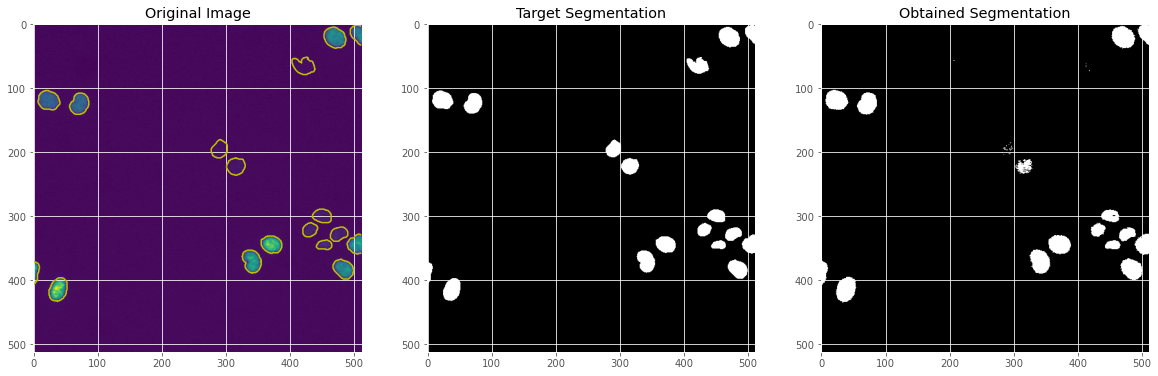

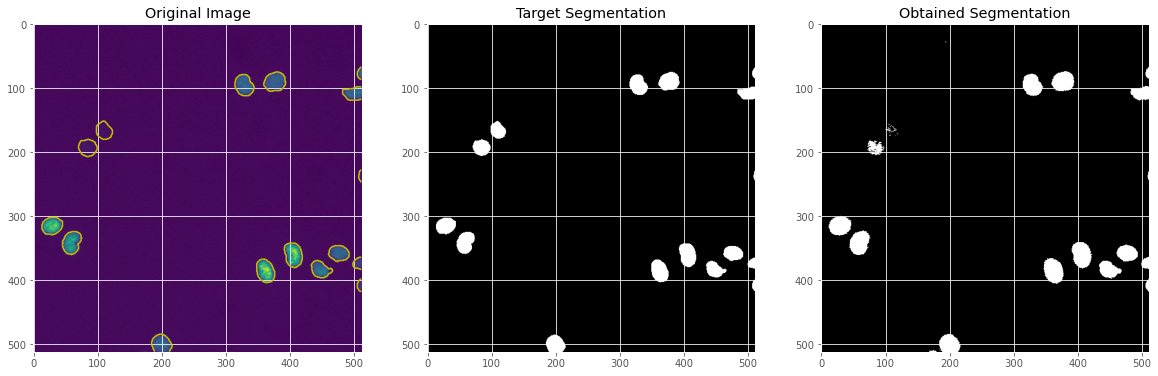

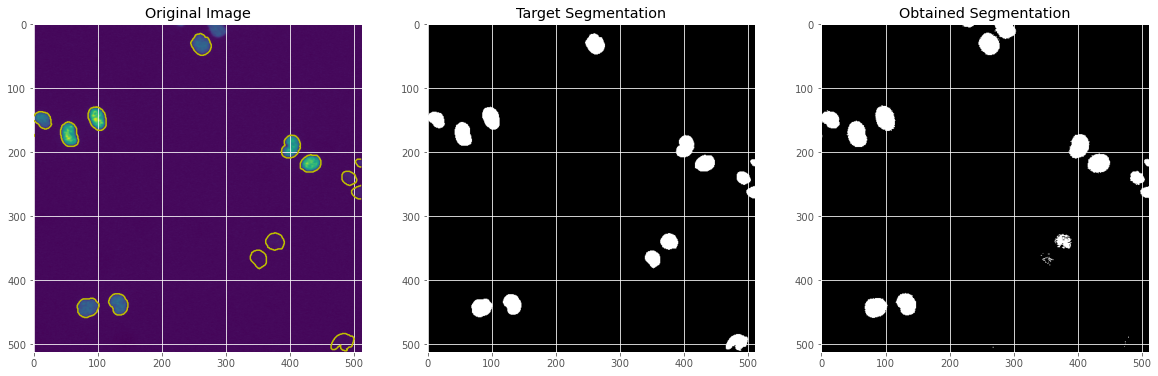

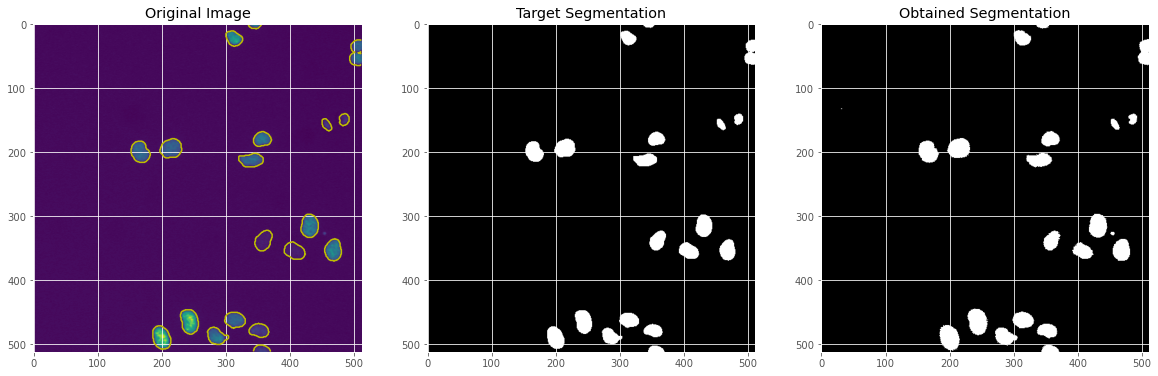

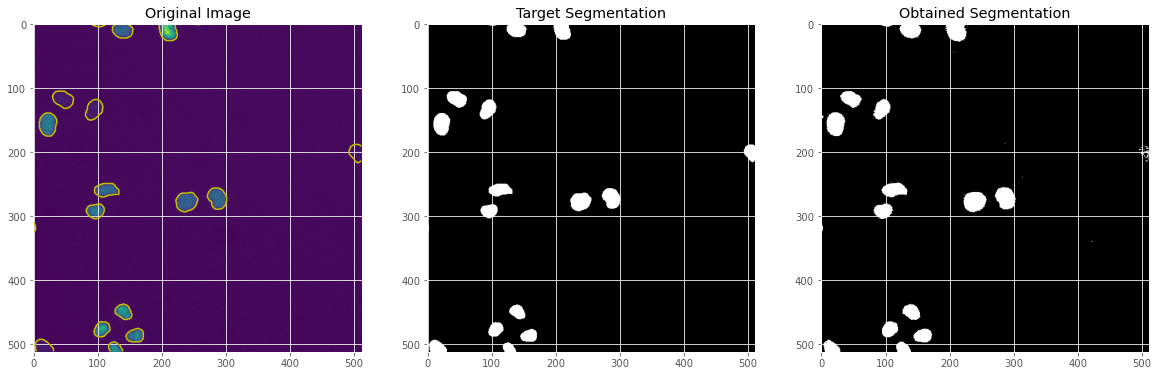

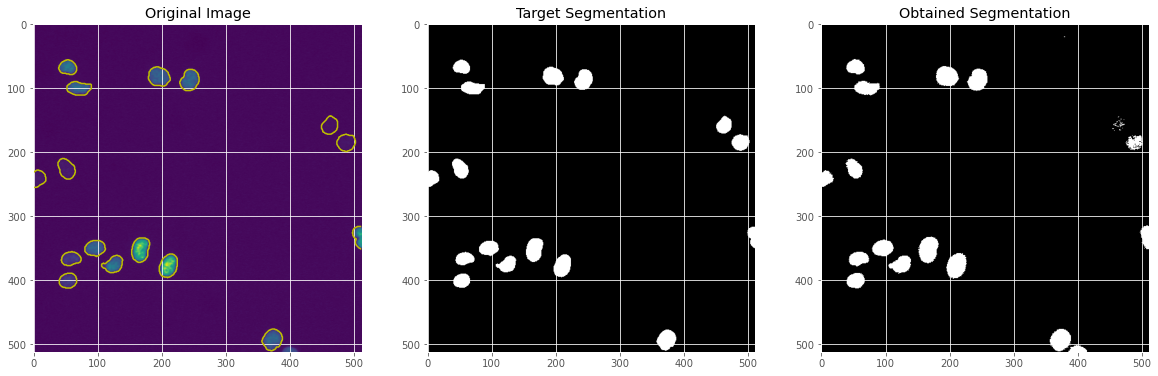

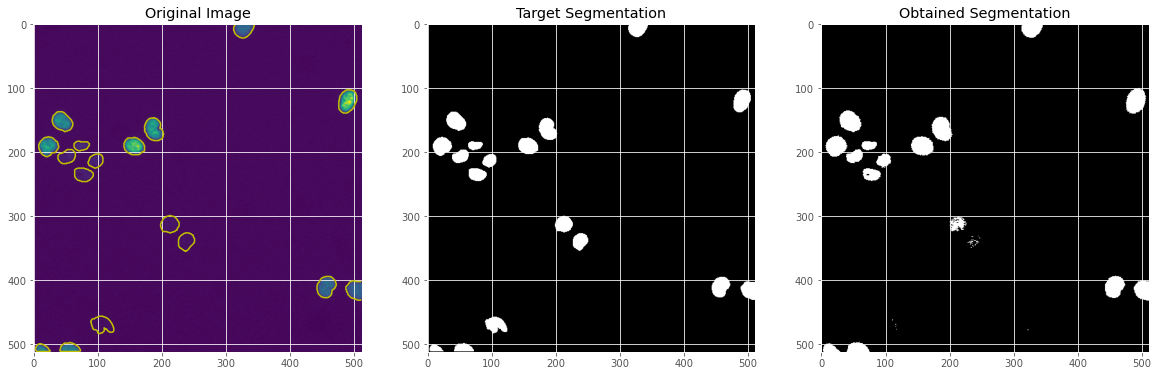

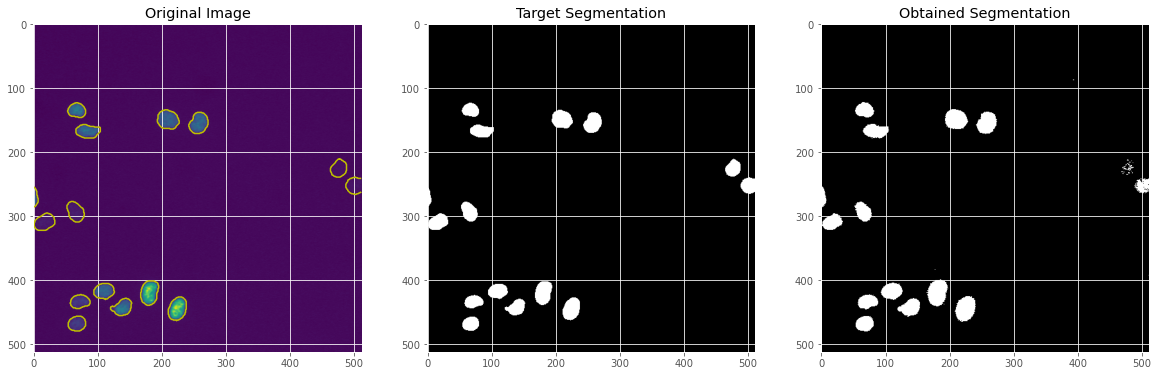

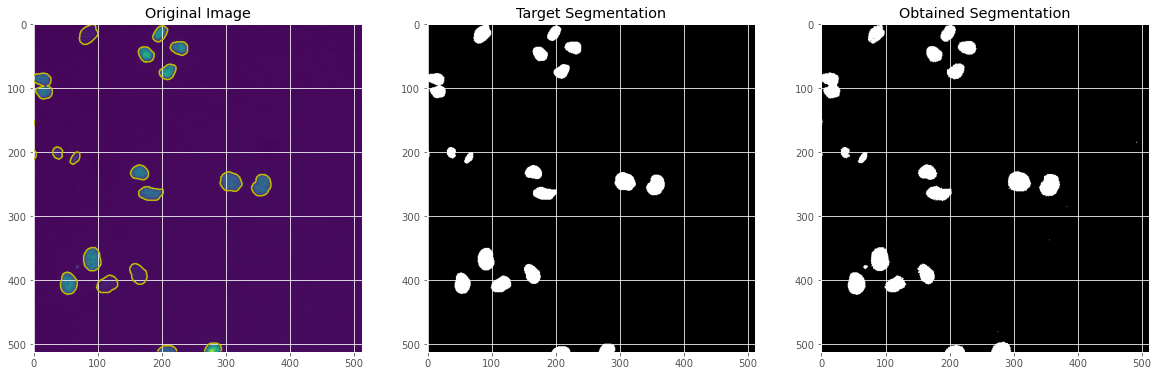

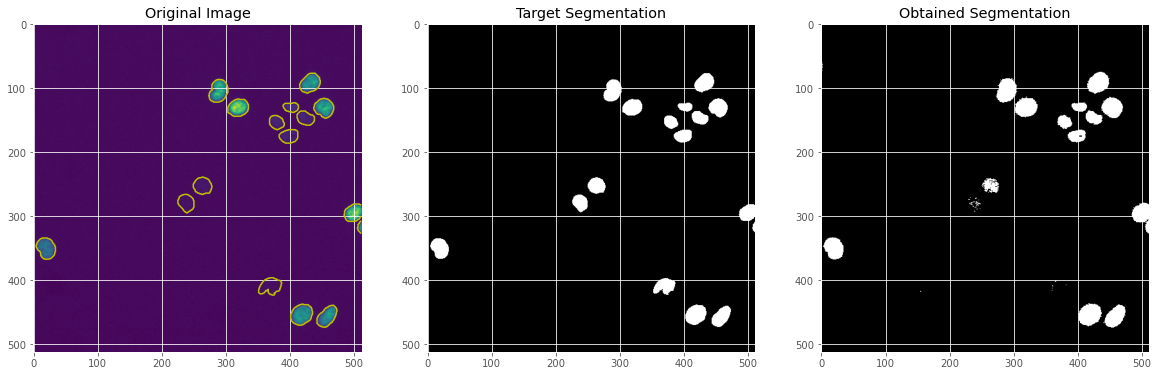

In [19]:
n = 10
h = 512
w = 512

Img = np.zeros((n, h, w), dtype=np.float32)
Mask = np.zeros((n, h, w), dtype=np.float32)
Pred = np.zeros((n, h, w), dtype=np.float32)

for i in range(10):
    image = Image.open('Saved/im'+str(i)+'.tiff')
    mas = Image.open('Saved/mas'+str(i)+'.tiff')
    pred = Image.open('Saved/pred'+str(i)+'.tiff')
    
    Img[i] = np.array(image)
    Mask[i] = np.array(mas, dtype=np.float32)
    Pred[i] = np.array(pred, dtype=np.float32)
    
    plot_comparison(image,mas,pred)

#### Analysis

In [32]:
mask = np.round(Mask.astype(int).flatten())
pred = np.round(Pred.astype(int).flatten())

mask[mask>=0.5] = 1
mask[mask<0.5] = 0
pred[pred>=0.5] = 1
pred[pred<0.5] = 0

display("Accuracy: ", accuracy_score(mask,pred))
display("F1 Score: ", jaccard_score(mask,pred))

'Accuracy: '

0.991518783569336

'F1 Score: '

0.7798146057400915